<a href="https://colab.research.google.com/github/MohdSharik99/Tensor_projects/blob/main/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

## Loading the dataset

In [ ]:
#loading the dataset

dataset, dataset_info = tfds.load('malaria' , with_info = True, shuffle_files = True, as_supervised = True, split= ['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete2PN6R2/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [ ]:
def splits(dataset, train_ratio, val_ratio, test_ratio):

  len_data = len(dataset)

  train_data = dataset.take(int(train_ratio*len_data))

  val_dataset = dataset.skip(int(train_ratio*len_data))
  val_data = val_dataset.take(int(val_ratio*len_data))

  test_data = val_dataset.skip(int(val_ratio*len_data))

  return train_data, val_data, test_data


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO )

In [ ]:
len(train_dataset)

22046

## Visualizing the dataset

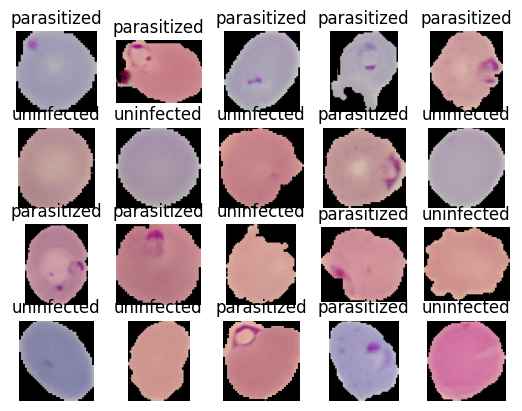

In [ ]:
for i , (image, label) in enumerate(train_dataset.take(20)):
  ax = plt.subplot(4, 5, i + 1)


  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str((label)))
  plt.axis('off')
  plt. subplots_adjust()

## Data Preprocessing

In [ ]:
image_size = 224

def resize_rescale(image, label):

  return tf.image.resize(image,  (image_size, image_size))/255.0 , label

In [ ]:
train_dataset  = train_dataset.map(resize_rescale)
val_dataset  = val_dataset.map(resize_rescale)
test_dataset  = test_dataset.map(resize_rescale)

In [ ]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:

val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_dataset = test_dataset.batch(1)


In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Model Building

In [ ]:
from tensorflow.python.ops.gen_nn_ops import conv2d
model = tf.keras.Sequential([ InputLayer( input_shape = (224,224,3 )),

                             tf.keras.layers.Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
                            BatchNormalization(),
                             MaxPool2D( pool_size = (2,2), strides = 2),

                            tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
                              BatchNormalization(),
                            MaxPool2D( pool_size = (2,2), strides = 2),


                              Flatten(),

                              Dense(100 , activation = 'relu'),
                              BatchNormalization(),

                              Dense(10 , activation = 'relu'),
                              BatchNormalization(),

                              Dense(1, activation = 'sigmoid')



                             ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_9 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_10 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from keras.optimizers.legacy.adam import Adam
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [ ]:
history = model.fit(train_dataset,  validation_data = val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 50s 72ms/step - loss: 0.3104 - accuracy: 0.8724 - val_loss: 0.2642 - val_accuracy: 0.9002
Epoch 2/20
689/689 [==============================] - 45s 65ms/step - loss: 0.2178 - accuracy: 0.9272 - val_loss: 2.5519 - val_accuracy: 0.5013
Epoch 3/20
689/689 [==============================] - 45s 65ms/step - loss: 0.2666 - accuracy: 0.9091 - val_loss: 4.4566 - val_accuracy: 0.6523
Epoch 4/20
689/689 [==============================] - 45s 65ms/step - loss: 0.2335 - accuracy: 0.9179 - val_loss: 0.7527 - val_accuracy: 0.5074
Epoch 5/20
689/689 [==============================] - 44s 64ms/step - loss: 0.1874 - accuracy: 0.9364 - val_loss: 0.1613 - val_accuracy: 0.9492
Epoch 6/20
689/689 [==============================] - 47s 68ms/step - loss: 0.1791 - accuracy: 0.9380 - val_loss: 0.2877 - val_accuracy: 0.8893
Epoch 7/20
689/689 [==============================] - 44s 63ms/step - loss: 0.1611 - accuracy: 0.9459 - val_loss: 0.1560 - val_accuracy:

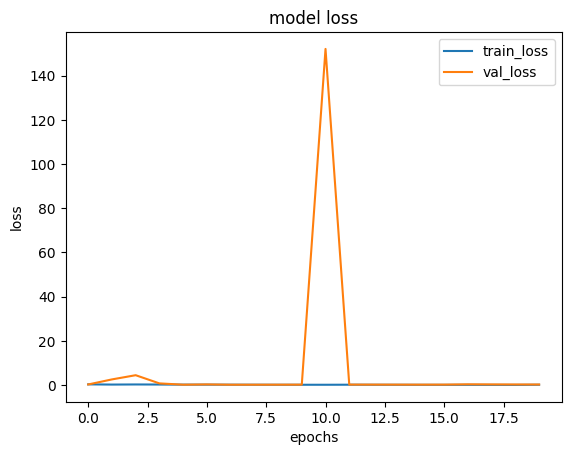

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('model loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

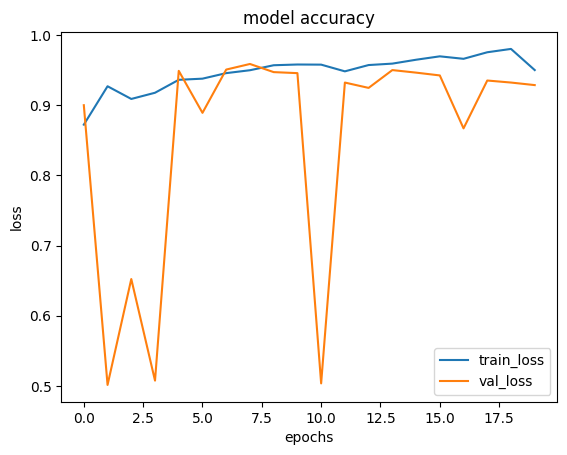

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('model accuracy')
plt.legend(['train_loss', 'val_loss'])
plt.show()

## Evaluation time

In [ ]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 22s 4ms/step - loss: 0.2783 - accuracy: 0.9177


[0.27829164266586304, 0.917664110660553]

In [ ]:
def parasatite(x):

  if x<0.5:
    return 'P'
  else:
    return 'U'

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 13s 13s/step


0.82979184

1/1 [==============================] - 0s 18ms/step


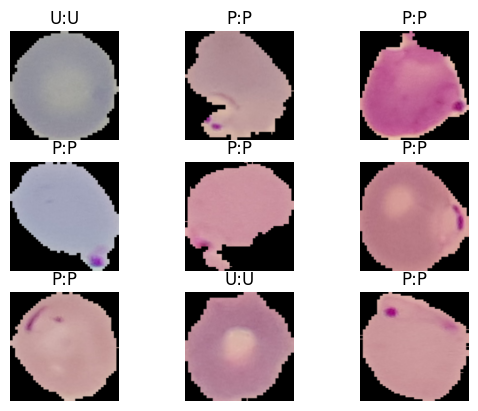

In [ ]:
for i , (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)


  plt.imshow(image[0])
  plt.title(str(parasatite(label.numpy()[0])) + ':' +  str(parasatite(model.predict(image)[0][0])))
  plt.axis('off')
  plt. subplots_adjust()

## Loading and saving

In [ ]:
model.save('LenetModel')

In [ ]:
lenet_loaded_model  = tf.keras.models.load_model('LenetModel')
lenet_loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_9 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_10 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

1/1 [==============================] - 0s 30ms/step


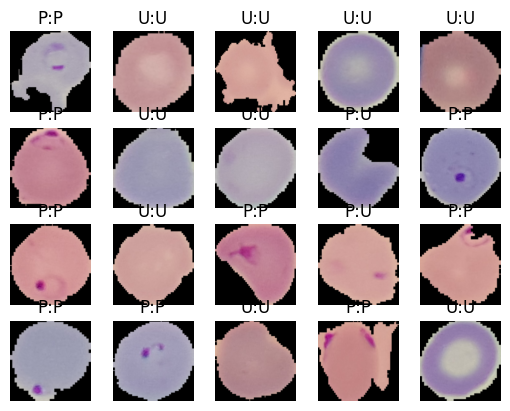

In [ ]:
for i , (image, label) in enumerate(train_dataset.take(20)):
  ax = plt.subplot(4, 5, i + 1)


  plt.imshow(image[0])
  plt.title(str(parasatite(label.numpy()[0])) + ':' +  str(parasatite(lenet_loaded_model.predict(image)[0][0])))
  plt.axis('off')
  plt. subplots_adjust()